# Get the data

Get the data processed in the previous notebook (Exploratory Data Analysis)

In [1]:
import pandas as pd

In [2]:
from src.constants import X_TRAIN_PATH, X_TEST_PATH, Y_TRAIN_PATH, Y_TEST_PATH

# save the processed data to their corresponding files
X_train = pd.read_csv(filepath_or_buffer=X_TRAIN_PATH, sep=',')
X_test = pd.read_csv(filepath_or_buffer=X_TEST_PATH, sep=',')

y_train = pd.read_csv(filepath_or_buffer=Y_TRAIN_PATH, sep=',')
y_train = y_train['class'].to_numpy()

y_test = pd.read_csv(filepath_or_buffer=Y_TEST_PATH, sep=',')
y_test = y_test['class'].to_numpy()

In [3]:
# verify x_train
X_train.head()

,Latitude,Longitude,MedInc
0,32.71,-117.03,3.2596
1,33.77,-118.16,3.8125
2,34.66,-120.48,4.1563
3,32.69,-117.11,1.9425
4,36.78,-119.80,3.5542


In [4]:
# verify x_test
X_test.head()

,Latitude,Longitude,MedInc
0,36.06,-119.01,1.6812
1,35.14,-119.46,2.5313
2,37.80,-122.44,3.4801
3,34.28,-118.72,5.7376
4,36.62,-121.93,3.7250


In [5]:
# verify y_train
y_train

array([3, 3, 4, ..., 3, 2, 1])

In [6]:
# verify y_test
y_test

array([4, 4, 1, ..., 2, 4, 3])

# Option 1. Default model

## Step 1: Initialization and training of the model

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state = 42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [8]:
print(f"Hyperparameters of the default model: {model.get_params()}")

Hyperparameters of the default model: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


## Step 2: Model prediction

In [9]:
# make the prediction
y_pred = model.predict(X_test)
y_pred

array([4, 4, 1, ..., 2, 4, 3])

In [10]:
# make the prediction of the probabilities of being one class or another
y_prob = model.predict_proba(X_test)

## Step 3: Metrics

Let's print the full report of the model

In [11]:
labels: list[int] = [0, 1, 2, 3, 4, 5]

In [12]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report)


default_model_accuracy = accuracy_score(y_test, y_pred)
default_model_precision = precision_score(y_test, y_pred, average="weighted", labels=labels)
default_model_recall = recall_score(y_test, y_pred, average="weighted", labels=labels)
default_model_f1 = f1_score(y_test, y_pred, average="weighted", labels=labels)
default_model_auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovo', labels=labels)
default_model_confusion = confusion_matrix(y_test, y_pred, labels=labels)
default_model_report = classification_report(y_test, y_pred, labels=labels)

print(f'Accuracy: {default_model_accuracy}')
print(f'Precision: {default_model_precision}')
print(f'Recall: {default_model_recall}')
print(f'F1-Score: {default_model_f1}')
print(f'AUC-ROC: {default_model_auc_roc}')

Accuracy: 0.9932170542635659
Precision: 0.9932121580564631
Recall: 0.9932170542635659
F1-Score: 0.9932113658038362
AUC-ROC: 0.9998322396623466


In [13]:
print(f'Classification Report:\n\n{default_model_report}')

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       817
           1       0.99      0.99      0.99       960
           2       0.99      0.99      0.99       519
           3       1.00      1.00      1.00      1388
           4       0.99      0.99      0.99       338
           5       0.97      0.95      0.96       106

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



Now let's draw the confusion matrix

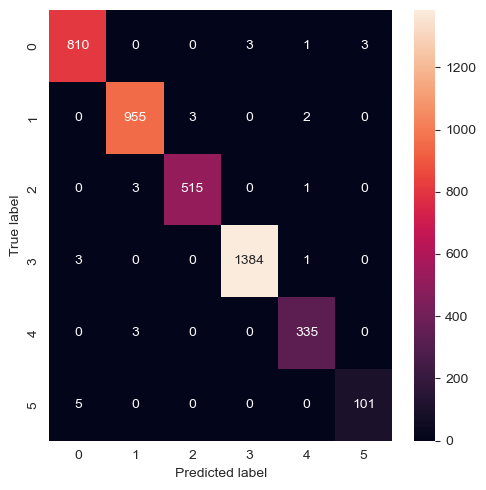

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt


plt.figure(figsize=(5, 5))

sns.heatmap(default_model_confusion, annot=True, fmt='')

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()


This confusion matrix reads as follows: The value on Y axis is the true label and the value in the X axis is the predicted label. We can see a very good performance from the model.

# Option 2. Model with optimization

In [24]:
# create another model
opt_model = GradientBoostingClassifier(random_state=42)

## Step 1: Create the hyperparameter optimization model

In [25]:
from sklearn.model_selection import GridSearchCV

# define the parameters that we want to adjust by hand, depends on the model to use
param_grid  = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9],
}

# initialize the grid
grid = GridSearchCV(opt_model, param_grid , scoring = 'accuracy', cv = 5, n_jobs=4, verbose=0)

## Step 2: Fit the model

In [26]:
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}


## Step 3: Get the best model and predict

In [27]:
# get the best parameters and model
best_params = grid.best_params_
best_model: GradientBoostingClassifier = grid.best_estimator_

In [28]:
# predict the values
y_pred = best_model.predict(X_test)

In [29]:
# make the prediction of the probabilities of being one class or another
y_prob = best_model.predict_proba(X_test)

## Step 4: Metrics of the model

In [30]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report)


optimized_model_accuracy = accuracy_score(y_test, y_pred)
optimized_model_precision = precision_score(y_test, y_pred, average="weighted", labels=labels)
optimized_model_recall = recall_score(y_test, y_pred, average="weighted", labels=labels)
optimized_model_f1 = f1_score(y_test, y_pred, average="weighted", labels=labels)
optimized_model_auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovo', labels=labels)
optimized_model_confusion = confusion_matrix(y_test, y_pred, labels=labels)
optimized_model_report = classification_report(y_test, y_pred, labels=labels)

print(f'Accuracy: {optimized_model_accuracy}')
print(f'Precision: {optimized_model_precision}')
print(f'Recall: {default_model_recall}')
print(f'F1-Score: {default_model_f1}')
print(f'AUC-ROC: {default_model_auc_roc}')

Accuracy: 0.9939437984496124
Precision: 0.9939403247629365
Recall: 0.9932170542635659
F1-Score: 0.9932113658038362
AUC-ROC: 0.9998322396623466


In [31]:
print(f'Classification Report:\n\n{default_model_report}')

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       817
           1       0.99      0.99      0.99       960
           2       0.99      0.99      0.99       519
           3       1.00      1.00      1.00      1388
           4       0.99      0.99      0.99       338
           5       0.97      0.95      0.96       106

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



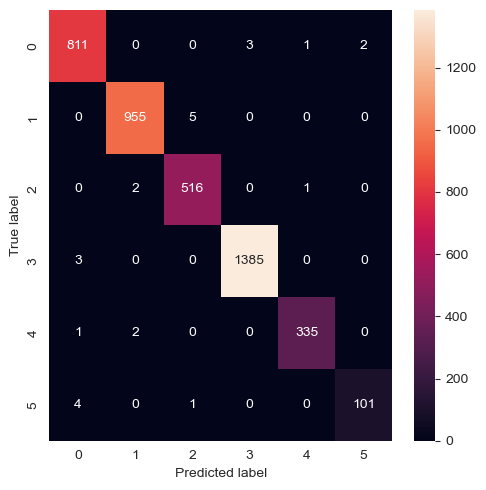

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt


plt.figure(figsize=(5, 5))

sns.heatmap(optimized_model_confusion, annot=True, fmt='')

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()

This confusion matrix reads as follows: The value on Y axis is the true label and the value in the X axis is the predicted label. We can see this model has an even better performance than the default model.

# Conclusion

In [35]:

from src.markdown_utils import show_comparison_table

# set the metrics to use
metrics: list[str] = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

# get the metrics of the default and optimized list values
default_model_metrics: list[float] = [default_model_accuracy, default_model_precision, default_model_recall, default_model_f1, default_model_auc_roc]
optimized_model_metrics: list[float] = [optimized_model_accuracy, optimized_model_precision, optimized_model_recall, optimized_model_f1, optimized_model_auc_roc]

# construct the Markdown table
show_comparison_table(
    metric_names=metrics,
    first_metrics=default_model_metrics,
    second_metrics=optimized_model_metrics,
    first_column_name="Default model",
    second_column_name="Optimized model",
)

| Metric | Default model | Optimized model |
|---|---|---|
| Accuracy | 0.993 | 0.994 |
| Precision | 0.993 | 0.994 |
| Recall | 0.993 | 0.994 |
| F1-Score | 0.993 | 0.994 |
| AUC-ROC | 1.0 | 1.0 |


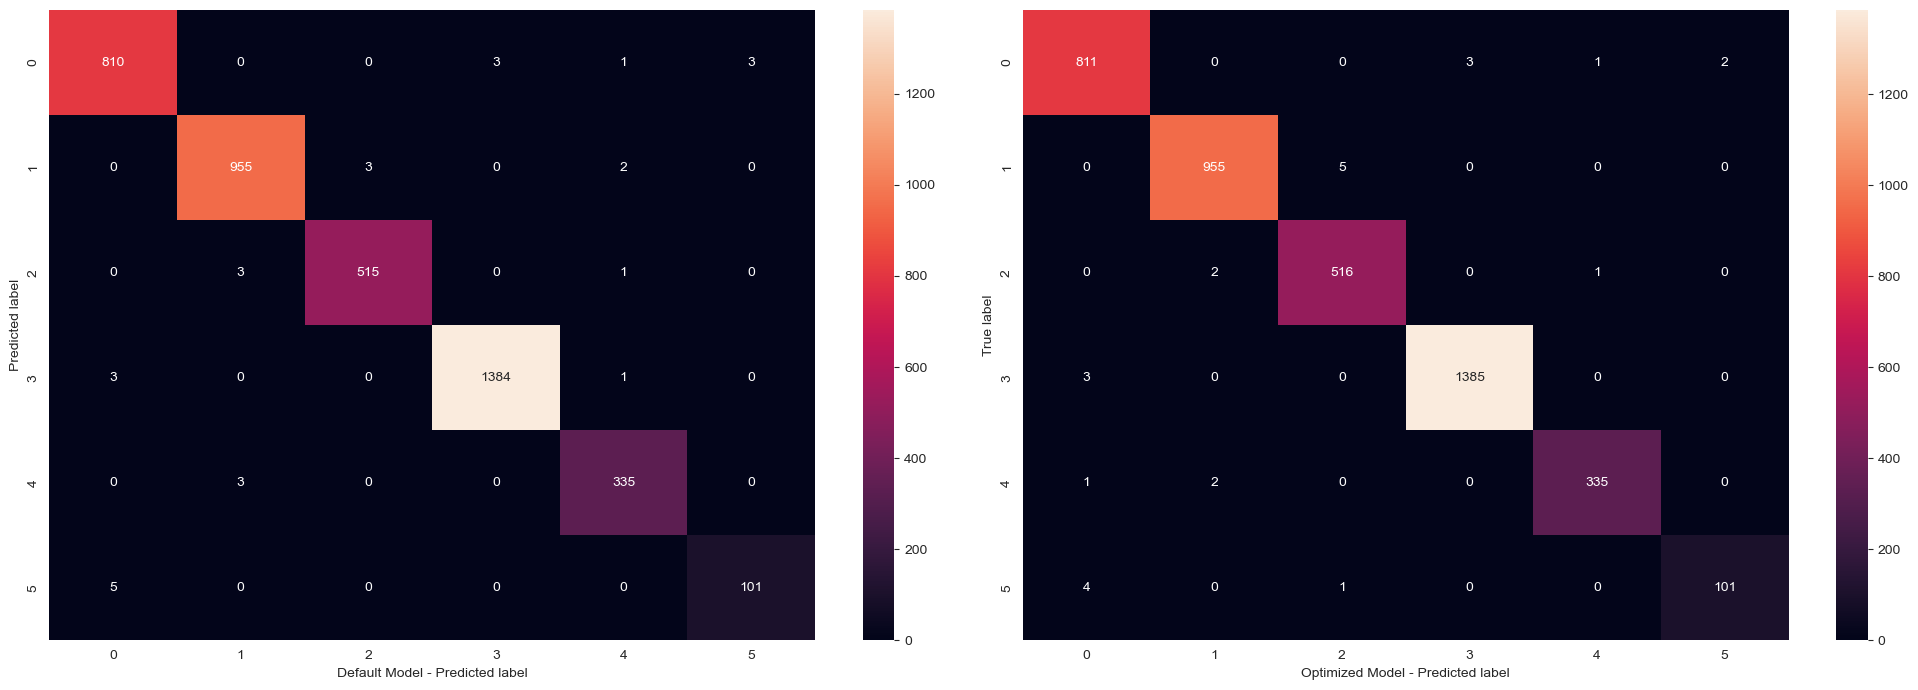

In [36]:
_, axis = plt.subplots(1, 2, figsize=(20, 7))

# first heatmap
sns.heatmap(ax=axis[0], data=default_model_confusion, annot=True, fmt='').set(
    xlabel=f'Default Model - Predicted label', ylabel='Predicted label'
)

# second heatmap
sns.heatmap(ax=axis[1], data=optimized_model_confusion, annot=True, fmt='').set(
    xlabel=f'Optimized Model - Predicted label', ylabel='True label'
)

plt.tight_layout()
plt.show()

#### Final Conclusion


We can see that the optimized model has a bit of a better performance with the label with less support, so the optimized one is the response to the declared problem.

#### Shap study of the best model

In [80]:
import shap

explainer = shap.Explainer(best_model.predict_proba, X_test)
explanation = explainer(X_test)

ExactExplainer explainer: 4129it [02:44, 23.49it/s]                          


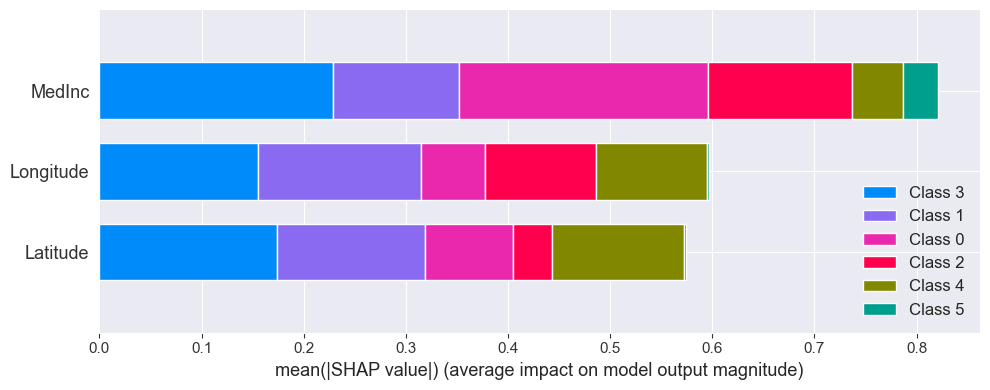

In [86]:
shap.summary_plot(explanation, X_test, plot_size=[10,4])

The features Longitude and Latitude appear to have a similar level of importance with MedInc having a bit of more importance, all of this based on the length of their bars. In general this suggests that the model is using all three features significantly to make predictions.

Class specific impact:

**MedInc:**
- MedInc has a varied impact across classes.
- It seems to have a higher impact on predicting Class 3 and Class 0.
- It has less impact on predicting Class 4 and 5.

**Longitude:**
- Longitude also has a varied impact.
- It seems to have a higher impact on predicting Class 1 and 3.
- It has less impact on predicting Class 0 and 5.

**Latitude:**
- Latitude shows a similar pattern to Longitude.
- It has a higher impact on predicting Class 1. 3 and 4.
- It has less impact on predicting Class 2 and 5.

With this information a domain expert can create new labels for the user data. This ended up being the class study of how to create new data using a non-supervised model, getting in this stage now a domain expert can put a domain name to the created classes and have more information that can be use in the future with another models.

# Save the model

Save the optimized model for future use.

In [87]:
from pickle import dump

with open("../models/optimized_xgboost.sav", "wb") as file:
    dump(best_model, file)